In [1]:
import sys
sys.path.append('../')
import ipywidgets as widgets
from IPython.display import display
import stackview
import datetime
from matplotlib import pyplot as plt
import numpy as np

import ailoc.lunar
import ailoc.deeploc
import ailoc.common
import logging
logger = logging.getLogger()
logger.setLevel(logging.ERROR)
ailoc.common.setup_seed(42)

%matplotlib inline

## 1. Set the paths of trained model, images, predictions and analyzer parameters. 

In [2]:
analyzer_param_widget = ailoc.common.SetAnalyzerParamWidget()
analyzer_param_widget.display_notebook_gui()

SelectFilesButton(description='Select trained model', icon='square-o', layout=Layout(height='80px', width='100…

Checkbox(value=True, description='Select all tiff files under the folder', indent=False)

SelectFilesButton(description='Select tiff file', icon='square-o', layout=Layout(height='80px', width='100%'),…

SaveFilesButton(description='Save predicted CSV', icon='square-o', layout=Layout(height='80px', width='100%'),…

GridspecLayout(children=(BoundedIntText(value=1, description='Block(GB)', layout=Layout(grid_area='widget001')…

Button(description='OK', style=ButtonStyle())

Output()

## 2. Run the code cell to initialize the analyzer

In [3]:
data_analyzer = ailoc.common.SmlmDataAnalyzer(loc_model=analyzer_param_widget.analyzer_param['loc_model'],
                                                 tiff_path=analyzer_param_widget.analyzer_param['tiff_path'],
                                                 output_path=analyzer_param_widget.analyzer_param['output_path'],
                                                 time_block_gb=analyzer_param_widget.analyzer_param['time_block_gb'],
                                                 batch_size=analyzer_param_widget.analyzer_param['batch_size'],
                                                 sub_fov_size=analyzer_param_widget.analyzer_param['sub_fov_size'],
                                                 over_cut=analyzer_param_widget.analyzer_param['over_cut'],
                                                 num_workers=analyzer_param_widget.analyzer_param['num_workers'])

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
the file to save the predictions is: D:/Li_Lab_users/fushuang/AI4Loc-master/results/2024-12-31-15LUNAR_LL_demo2-exp_npc_dmo1.2_predictions.csv
divide_and_conquer will append the pred list to existed csv, the last analyzed frame is: 79301
frame ranges || filename: 
[0-26675] || D:\Li_Lab_users\fushuang\AI4Loc-master\datasets\demo2-exp_npc_dmo1.2\npc_DMO1.2__6_MMStack_Default.ome.tif
[26676-53351] || D:\Li_Lab_users\fushuang\AI4Loc-master\datasets\demo2-exp_npc_dmo1.2\npc_DMO1.2__6_MMStack_Default_1.ome.tif
[53352-79300] || D:\Li_Lab_users\fushuang\AI4Loc-master\datasets\demo2-exp_npc_dmo1.2\npc_DMO1.2__6_MMStack_Default_2.ome.tif


## 3. Check the predictions about a specific frame

In [4]:
frame_num_widget = widgets.HBox([widgets.Label(value='Input the frame number:'), widgets.BoundedIntText(value=0, min=0, max=data_analyzer.tiff_dataset.sum_file_length-1, step=1,)])
out = widgets.interactive_output(data_analyzer.check_single_frame_output, {'frame_num': frame_num_widget.children[1]})

display(widgets.VBox([frame_num_widget, out]))

## 4. Run the code cell to analyze the data  

Applying histogram equalization to the xy offsets as the predictions with large uncertainties tend to concentrate on pixel centers in difficult conditions (low SNR, high density, etc.). So replace the original xnm and ynm with x_rescale and y_rescale, this will not affect the localization accuracy, only improve the visualization.


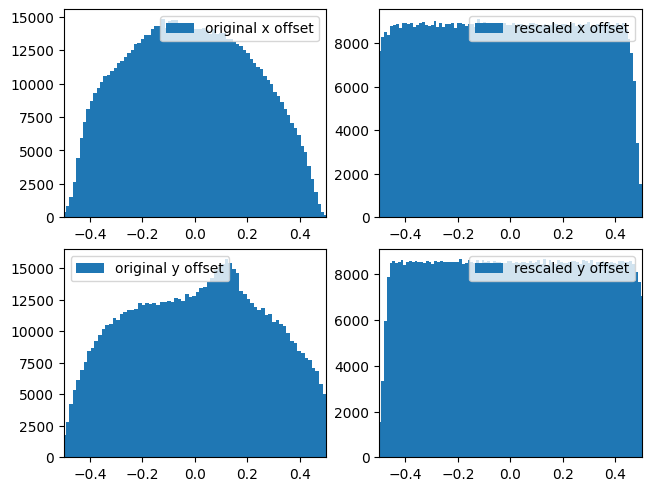

histogram equalization finished, time cost (min): 0.09
the file to save the rescaled predictions is: D:/Li_Lab_users/fushuang/AI4Loc-master/results/2024-12-31-15LUNAR_LL_demo2-exp_npc_dmo1.2_predictions_rescale.csv


In [5]:
preds_array, preds_rescale_array = data_analyzer.divide_and_conquer()

## 5. Render the results as a super-resolution image (recommend using SMAP)

C:\Users\SUST\.conda\envs\ailoc\lib\site-packages\matplotlib\colors.py:2094: RuntimeWarning: overflow encountered in divide
  s[ipos] = delta[ipos] / arr_max[ipos]
C:\Users\SUST\.conda\envs\ailoc\lib\site-packages\matplotlib\colors.py:2152: RuntimeWarning: invalid value encountered in multiply
  q = v * (1.0 - s * f)
D:\Li_Lab_users\fushuang\AI4Loc-master\demos\..\ailoc\common\plot_funcs.py:348: RuntimeWarning: invalid value encountered in cast
  sr_Im = PIL.Image.fromarray(np.array(np.round(sr_RGBfinal * 256), dtype='uint8'))


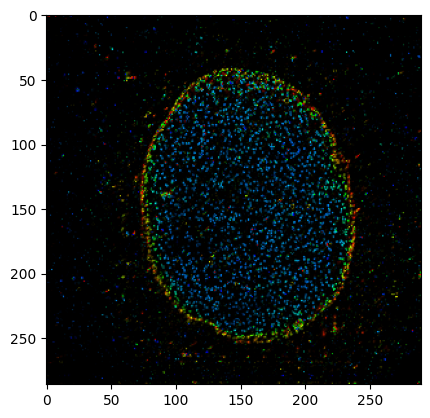

In [8]:
plt.figure()
hist_img = ailoc.common.create_3d_hist(preds_rescale_array, z_clip=[-1000, 1000], pix_size=100, sigma=5, contrast_fac=1, clip_density=99)
plt.imshow(hist_img)